In [54]:
import pandas as pd
import numpy as np
df=pd.read_csv("SolarPrediction.csv")
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 0:00,23:55:26,1.21,48,30.46,59,177.39,5.62,6:13:00,18:13:00
1,1475229023,9/29/2016 0:00,23:50:23,1.21,48,30.46,58,176.78,3.37,6:13:00,18:13:00
2,1475228726,9/29/2016 0:00,23:45:26,1.23,48,30.46,57,158.75,3.37,6:13:00,18:13:00
3,1475228421,9/29/2016 0:00,23:40:21,1.21,48,30.46,60,137.71,3.37,6:13:00,18:13:00
4,1475228124,9/29/2016 0:00,23:35:24,1.17,48,30.46,62,104.95,5.62,6:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 0:00,0:20:04,1.22,44,30.43,102,145.42,6.75,6:41:00,17:42:00
32682,1480587301,12/1/2016 0:00,0:15:01,1.17,44,30.42,102,117.78,6.75,6:41:00,17:42:00
32683,1480587001,12/1/2016 0:00,0:10:01,1.20,44,30.42,102,145.19,9.00,6:41:00,17:42:00
32684,1480586702,12/1/2016 0:00,0:05:02,1.23,44,30.42,101,164.19,7.87,6:41:00,17:42:00


In [55]:
#Calculate the mean for each class (also called as class centroid)(Suggestion: You may use numpy.mean() function for finding the average vector for all 
#vectors in a given class. Please define the axis property appropriately to use this function. EX: feat_vecs.mean(axis=0))
temp=df['Temperature']
hum=df['Humidity']
temp_mean=np.mean(temp,axis=0)
hum_mean=np.mean(hum,axis=0)
print("The mean of the temperature is ",temp_mean)
print("The mean of the humidity is ",hum_mean)

The mean of the temperature is  51.10325521630055
The mean of the humidity is  75.01630667564095


In [56]:
interclass_distance=np.linalg.norm(temp_mean-hum_mean)
print(interclass_distance)

23.913051459340394


In [57]:
#Calculate spread (standard deviation) for each class(Suggestion: You may use numpy.std() function for finding the standard deviation vector 
#for all vectors in a given class. Please define the axis property appropriately to use this function.)
temp_std=np.std(temp,axis=0)
hum_std=np.std(hum,axis=0)
print(temp_std)
print(hum_std)

6.201062496782136
25.989820931234355


In [58]:
interclass_distance=np.linalg.norm(temp_std-hum_std)
print("The interclass distance between temp and hum interclass_distance ",interclass_distance)

The interclass distance between temp and hum interclass_distance  19.78875843445222


In [59]:
intra_class_spread_temp = np.mean(np.linalg.norm(temp - temp_mean))
intra_class_spread_hum = np.mean(np.linalg.norm(hum - hum_mean))

print("Intraclass spread for Temperature:", intra_class_spread_temp)
print("Intraclass spread for Humidity:", intra_class_spread_hum)

Intraclass spread for Temperature: 1121.106825260192
Intraclass spread for Humidity: 4698.769871843256


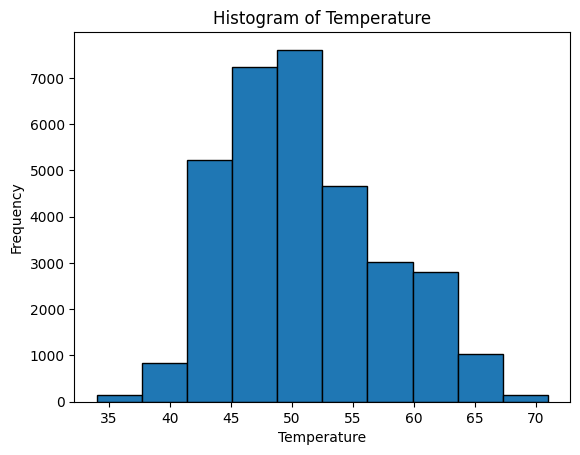

The mean of the temperature is  51.10325521630055


In [60]:
#Take any feature from your dataset. Observe the density pattern for that feature by plotting the histogram. Use buckets (data in ranges) for histogram 
#generation and study. Calculate the mean and variance from the available data.
# Sample feature_data (replace this with your actual data)
feature_data = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
import matplotlib.pyplot as plt
# Create a histogram with 5 bins
plt.hist(temp, bins=10, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()
print("The mean of the temperature is ",temp_mean)

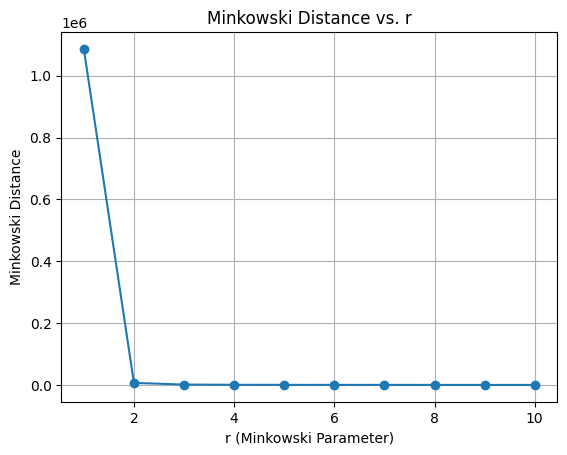

In [61]:
#Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 to 10. Make a plot of the distance and observe the 
#nature of this graph

r_values = list(range(1, 11))
distances = []

for r in r_values:
    distance = np.linalg.norm(hum - temp, ord=r)
    distances.append(distance)

plt.plot(r_values, distances, marker='o', linestyle='-')
plt.xlabel('r (Minkowski Parameter)')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()


In [62]:
#4. Divide dataset in your project into two parts – train & test set. To accomplish this, use the traintest_split() function available in SciKit.
from sklearn.model_selection import train_test_split
df['Radiation_Class'] = pd.cut(df['Radiation'], bins=[0, 800, 1610], labels=['Low', 'High'])
X= df.loc[:,"Temperature":"Speed"]
y= df["Radiation_Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [63]:
#A5
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [64]:
#A6
neigh.score(X_test, y_test)

0.9478433771795656

In [65]:
#A7
neigh.predict([[62,30.43,53,65.07,7.87]])

C:\Users\SNS\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['High'], dtype=object)

0.9478433771795656


C:\Users\SNS\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


['High']
Both predictions are correct with accuracy score: k=1: 1.0 and k=3: 0.9478433771795656


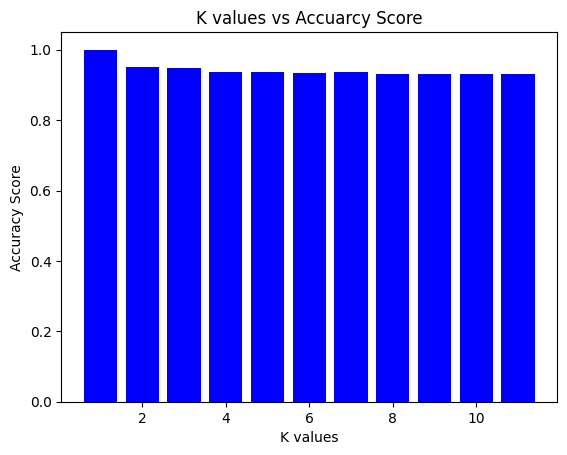

In [66]:
#A8
k_3_score=neigh.score(X_test, y_test)
print(k_3_score)
neigh = KNeighborsClassifier(n_neighbors=1) 
neigh.fit(X, y)
k_1_score=neigh.score(X_test, y_test)
print(neigh.predict([[62,30.43,	53,65.07,7.87]]))
print(f'Both predictions are correct with accuracy score: k=1: {k_1_score} and k=3: {k_3_score}')

x_axis= np.arange(1,12)
y_axis=[]

for i in range(1,12):
    neigh = KNeighborsClassifier(n_neighbors=i) 
    neigh.fit(X, y)
    y_axis.append(neigh.score(X_test, y_test))

plt.bar(x_axis,y_axis,color='blue')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.title('K values vs Accuarcy Score')
plt.show()

CF (train): [[ 1652   847]
 [  481 23168]]
CF (test): [[ 424  230]
 [ 111 5773]]


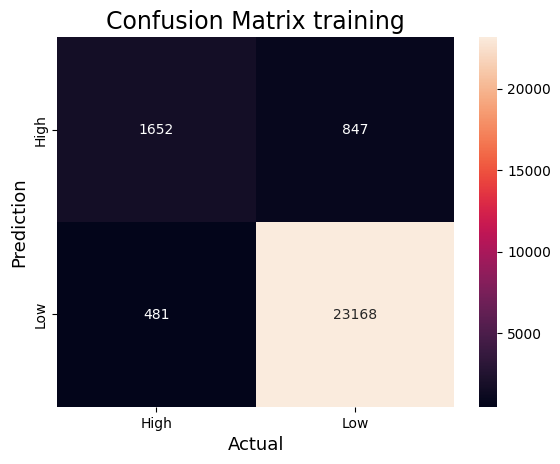

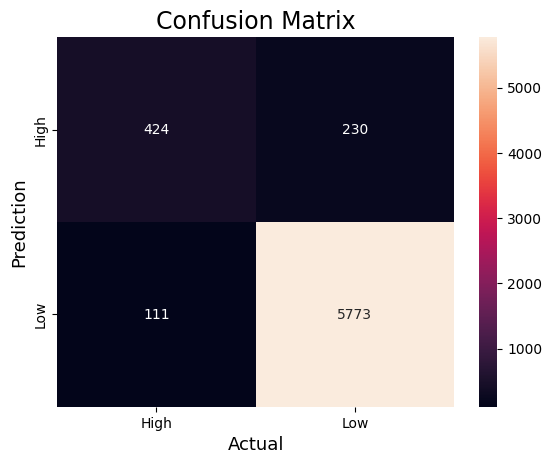

precision (train): 0.7744960150023441
recall (train): 0.6610644257703081
f1_score (train): 0.7132987910189982

precision (test): 0.7925233644859813
recall (test): 0.6483180428134556
f1_score (test): 0.7132043734230445


In [67]:
#A9
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3) 
neigh.fit(X, y)

y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

confusion_matrix_train = confusion_matrix(y_train, y_train_pred, labels=['High', 'Low'])
confusion_matrix_test = confusion_matrix(y_test, y_test_pred, labels=['High', 'Low'])
print(f'CF (train): {confusion_matrix_train}')
print(f'CF (test): {confusion_matrix_test}')
sns.heatmap(confusion_matrix_train,
            annot=True,
            fmt='g',
            xticklabels=['High','Low'],
            yticklabels=['High','Low'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix training',fontsize=17)
plt.show()
sns.heatmap(confusion_matrix_test,
            annot=True,
            fmt='g',
            xticklabels=['High','Low'],
            yticklabels=['High','Low'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
precision_train = precision_score(y_train, y_train_pred, pos_label='High')
recall_train = recall_score(y_train, y_train_pred, pos_label='High')
f1_score_train = f1_score(y_train, y_train_pred, pos_label='High')

print(f'precision (train): {precision_train}')
print(f'recall (train): {recall_train}')
print(f'f1_score (train): {f1_score_train}\n')

precision_test = precision_score(y_test, y_test_pred, pos_label='High')
recall_test = recall_score(y_test, y_test_pred, pos_label='High')
f1_score_test = f1_score(y_test, y_test_pred, pos_label='High')

print(f'precision (test): {precision_test}')
print(f'recall (test): {recall_test}')
print(f'f1_score (test): {f1_score_test}')
